<a href="https://colab.research.google.com/github/yaajnu/Project/blob/main/Mechademy_data_science_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('propulsion.csv')

In [ ]:
df

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2.088,6.0,5858.780,1349.023,6736.273,23.171,23.171,581.017,288.0,564.922,1.294,0.998,6.991,1.019,21.583,0.245,0.999,0.988
9996,9996,5.140,15.0,21633.743,1924.349,8497.158,175.288,175.288,696.232,288.0,635.894,2.078,0.998,10.947,1.026,24.481,0.485,0.971,1.000
9997,9997,8.206,24.0,50994.819,3087.555,9324.455,438.051,438.051,928.531,288.0,737.443,3.560,0.998,18.200,1.041,60.306,1.194,0.953,0.996
9998,9998,6.175,18.0,29761.078,2306.850,8793.302,245.973,245.973,783.490,288.0,668.558,2.513,0.998,13.412,1.030,34.919,0.691,0.982,0.975


In [ ]:
#Just a duplicate column of the indexes which isnt required
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.088,6.0,5858.780,1349.023,6736.273,23.171,23.171,581.017,288.0,564.922,1.294,0.998,6.991,1.019,21.583,0.245,0.999,0.988
9996,5.140,15.0,21633.743,1924.349,8497.158,175.288,175.288,696.232,288.0,635.894,2.078,0.998,10.947,1.026,24.481,0.485,0.971,1.000
9997,8.206,24.0,50994.819,3087.555,9324.455,438.051,438.051,928.531,288.0,737.443,3.560,0.998,18.200,1.041,60.306,1.194,0.953,0.996
9998,6.175,18.0,29761.078,2306.850,8793.302,245.973,245.973,783.490,288.0,668.558,2.513,0.998,13.412,1.030,34.919,0.691,0.982,0.975


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lever position (lp) [ ]                        10000 non-null  float64
 1   Ship speed (v) [knots]                         10000 non-null  float64
 2   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 3   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 7   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 8   GT Compressor inlet air temperature (T1) [C]   10000 non-null  float64
 9   GT Compressor outlet air temperature (T2) [C]  1000

In [ ]:
df.isnull().sum()#No null values !!

Lever position (lp) [ ]                          0
Ship speed (v) [knots]                           0
Gas Turbine shaft torque (GTT) [kN m]            0
Gas Turbine rate of revolutions (GTn) [rpm]      0
Gas Generator rate of revolutions (GGn) [rpm]    0
Starboard Propeller Torque (Ts) [kN]             0
Port Propeller Torque (Tp) [kN]                  0
HP Turbine exit temperature (T48) [C]            0
GT Compressor inlet air temperature (T1) [C]     0
GT Compressor outlet air temperature (T2) [C]    0
HP Turbine exit pressure (P48) [bar]             0
GT Compressor inlet air pressure (P1) [bar]      0
GT Compressor outlet air pressure (P2) [bar]     0
Gas Turbine exhaust gas pressure (Pexh) [bar]    0
Turbine Injecton Control (TIC) [%]               0
Fuel flow (mf) [kg/s]                            0
GT Compressor decay state coefficient.           0
GT Turbine decay state coefficient.              0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

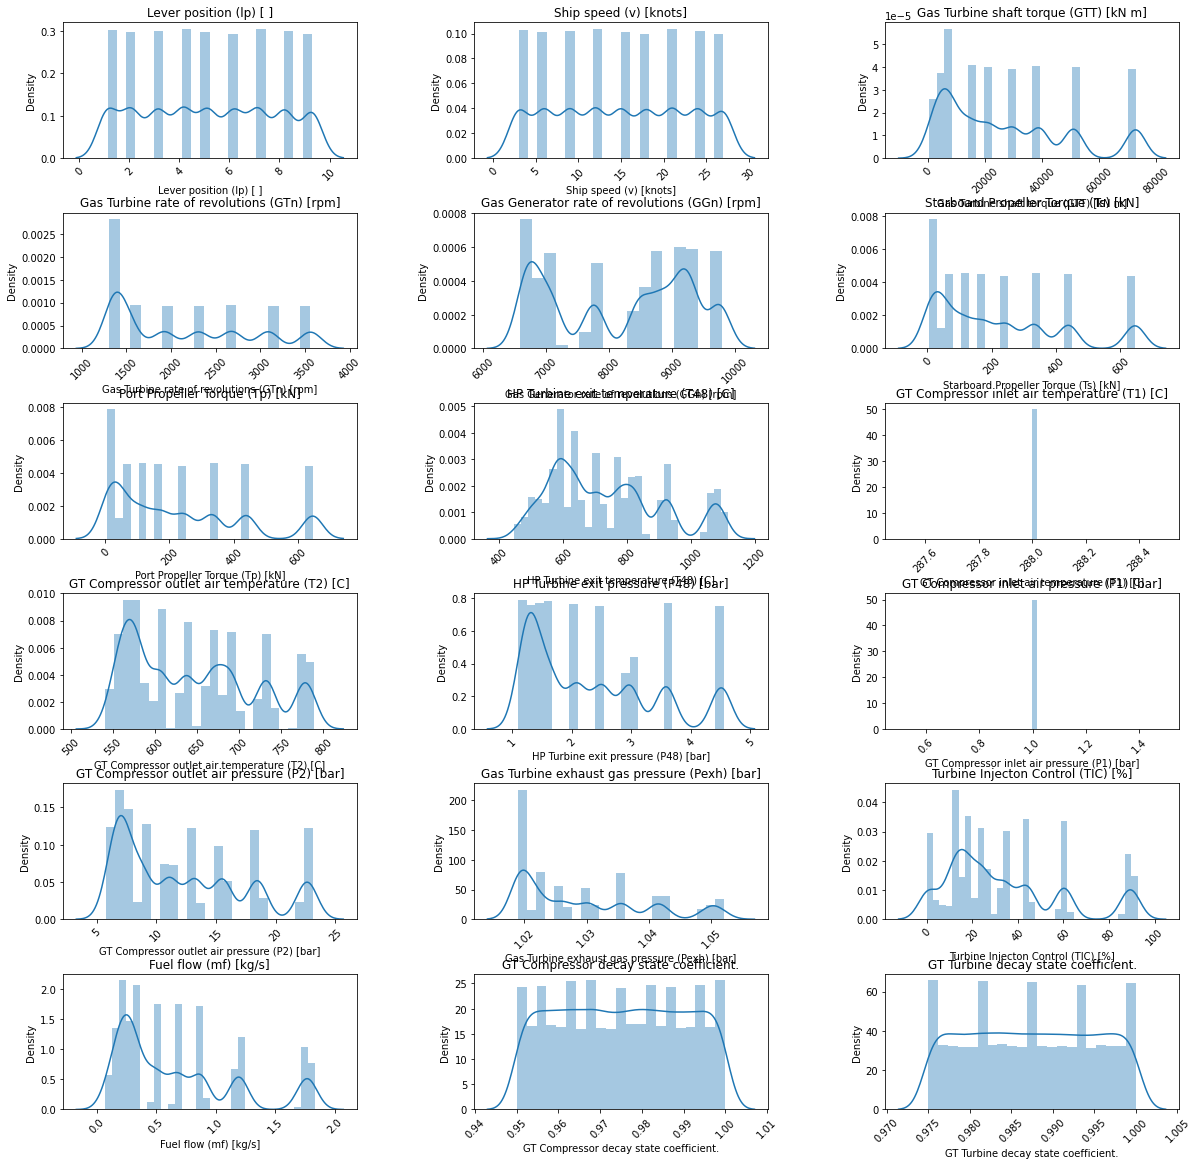

In [ ]:
fig=plt.figure(figsize=(20,20))
cols=3
plt.subplots_adjust(wspace=0.4,hspace=0.4)
rows=int(np.ceil((df.shape[1])/cols))
for i,column in enumerate(df.columns):
  ax=fig.add_subplot(rows,cols,i+1)
  ax.set_title(column)
  sns.distplot(df[column])
  plt.xticks(rotation=45)

In [ ]:
scaler=StandardScaler()
df_labels=df.iloc[:,-2:]

In [ ]:
df.iloc[:,:-2]=scaler.fit_transform(df.iloc[:,:-2])

In [ ]:
df.corr()['GT Compressor decay state coefficient.'].sort_values(ascending=False)#The values of the correlation with Inlet air temp and pressure is Not defined as their variance might be0

GT Compressor decay state coefficient.           1.000000
Gas Turbine exhaust gas pressure (Pexh) [bar]    0.033397
GT Compressor outlet air pressure (P2) [bar]     0.006488
HP Turbine exit pressure (P48) [bar]             0.006266
Gas Turbine shaft torque (GTT) [kN m]            0.000736
Gas Turbine rate of revolutions (GTn) [rpm]      0.000156
GT Turbine decay state coefficient.             -0.000985
Port Propeller Torque (Tp) [kN]                 -0.001594
Starboard Propeller Torque (Ts) [kN]            -0.001594
Ship speed (v) [knots]                          -0.002009
Lever position (lp) [ ]                         -0.002070
Fuel flow (mf) [kg/s]                           -0.015835
Gas Generator rate of revolutions (GGn) [rpm]   -0.020852
Turbine Injecton Control (TIC) [%]              -0.034149
HP Turbine exit temperature (T48) [C]           -0.041719
GT Compressor outlet air temperature (T2) [C]   -0.049096
GT Compressor inlet air temperature (T1) [C]          NaN
GT Compressor 

In [ ]:
np.var(df['GT Compressor inlet air pressure (P1) [bar]'])

0.0

In [ ]:
np.var(df['GT Compressor inlet air temperature (T1) [C]'])

0.0

As predicted their variance is indeed 0 so we need some other measure to check their correlation with decay state(And it wont hurt model performance by including it in the input data)


In [ ]:
df.corr()['GT Turbine decay state coefficient.'].sort_values(ascending=False)

GT Turbine decay state coefficient.              1.000000
Gas Turbine exhaust gas pressure (Pexh) [bar]    0.011264
Gas Generator rate of revolutions (GGn) [rpm]    0.008703
Gas Turbine shaft torque (GTT) [kN m]           -0.000533
Port Propeller Torque (Tp) [kN]                 -0.000669
Starboard Propeller Torque (Ts) [kN]            -0.000669
Gas Turbine rate of revolutions (GTn) [rpm]     -0.000677
GT Compressor decay state coefficient.          -0.000985
Ship speed (v) [knots]                          -0.001008
Lever position (lp) [ ]                         -0.001045
HP Turbine exit pressure (P48) [bar]            -0.003528
GT Compressor outlet air temperature (T2) [C]   -0.018060
Fuel flow (mf) [kg/s]                           -0.018168
Turbine Injecton Control (TIC) [%]              -0.019169
GT Compressor outlet air pressure (P2) [bar]    -0.019171
HP Turbine exit temperature (T48) [C]           -0.039901
GT Compressor inlet air temperature (T1) [C]          NaN
GT Compressor 

Lets train a random forest regressor for compressor decay coefficient

In [ ]:
from sklearn.ensemble import RandomForestRegressor
foreg=RandomForestRegressor()

In [ ]:
df.drop(df_labels.columns,axis=1,inplace=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df,df_labels,test_size=0.05)

In [ ]:
foreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
foreg.score(X_train,y_train)#R^2 value    

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9992245217318675

In [ ]:
y_pred=foreg.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train.iloc[:,0],y_pred[:,0],squared=False))#RMSE for the prediction of compressor decay state coefficient

0.00035729477219361295


In [ ]:
mean_squared_error(y_train.iloc[:,1],y_pred[:,1],squared=False)#RMSE for the prediction of turbine decay state coefficient

0.00028897040599746394

Now to check our model on test data that we set aside to check if it isn't overiftting and generalizes well

In [ ]:
y_pred_test=foreg.predict(X_test)
mean_squared_error(y_test,y_pred_test,squared=False)#Rmse  is very low,i.e,the random forest model works very well

0.0007903391663992827

We can further optimize this model by removing certain columns dont affect the predictions as random forests class offers a feature importances attribute which allows us to check this

In [ ]:
for i,j in zip(df.columns,foreg.feature_importances_):
  print('For {} : {}'.format(i,j),end='\n\n')

For Lever position (lp) [ ] : 0.001597706006070447

For Ship speed (v) [knots] : 0.0018974817132217045

For Gas Turbine shaft torque (GTT) [kN m] : 0.10769815761814576

For Gas Turbine rate of revolutions (GTn) [rpm] : 0.03660372696703956

For Gas Generator rate of revolutions (GGn) [rpm] : 0.1703145188606018

For Starboard Propeller Torque (Ts) [kN] : 0.007146368212738225

For Port Propeller Torque (Tp) [kN] : 0.008935663148301893

For HP Turbine exit temperature (T48) [C] : 0.03064382373302074

For GT Compressor inlet air temperature (T1) [C] : 0.0

For GT Compressor outlet air temperature (T2) [C] : 0.25487611398807836

For HP Turbine exit pressure (P48) [bar] : 0.17731018115529537

For GT Compressor inlet air pressure (P1) [bar] : 0.0

For GT Compressor outlet air pressure (P2) [bar] : 0.030526645526296345

For Gas Turbine exhaust gas pressure (Pexh) [bar] : 0.13596083859244104

For Turbine Injecton Control (TIC) [%] : 0.029890634823428405

For Fuel flow (mf) [kg/s] : 0.00659813965

Let's try out a new random forest model which drops the inlet air temperature and pressure as it has no bearing on the predictions


In [ ]:
#Since lever position and ship speed have no use in predicting we can try dropping this and then retry random forest for a faster(And maybe better) model
df_new=df.drop(['GT Compressor inlet air pressure (P1) [bar]','GT Compressor inlet air temperature (T1) [C]'],axis=1)

In [ ]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(df,df_labels,test_size=0.05)

In [ ]:
for1=RandomForestRegressor()
for1.fit(X_train_new,y_train_new)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_new=for1.predict(X_train_new)


In [ ]:
mean_squared_error(y_pred_new[:,0],y_train_new.iloc[:,0],squared=False)#RMSE for the prediction of compressor decay state coefficient

0.00036386166254601067

In [ ]:
mean_squared_error(y_pred_new[:,1],y_train_new.iloc[:,1],squared=False)#RMSE for the prediction of turbine decay state coefficient

0.000284557284337559

In [ ]:
y_pred_test_new=for1.predict(X_test_new)

In [ ]:
mean_squared_error(y_pred_test_new,y_test_new,squared=False)#The rmse has increased by a bit so it would be better to stick to all columns for prediction

0.000708465432610484

The original model works better by a small margin


Let's try out a SVM regressor now

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_reg0=SVR()
svr_reg1=SVR()

In [ ]:
svr_reg0.fit(X_train,y_train.iloc[:,0])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
mean_squared_error(svr_reg.predict(X_train),y_train.iloc[:,0],squared=False)

0.014695853335657582

In [ ]:
svr_reg1.fit(X_train,y_train.iloc[:,1])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
mean_squared_error(svr_reg1.predict(X_train),y_train.iloc[:,1],squared=False)

0.007505527787465797

This is clearly much worse than random forests so we'll stick to random forest model for making prediction

Lets save the model and the standard scaler which will be useful to scale the test data while making predictions

In [ ]:
filename='Randomforest_task2.sav'
pickle.dump(foreg, open(filename, 'wb'))



In [ ]:
filename1='variables_scaler.pkl'
pickle.dump(scaler,open(filename1,'wb'))

Get the curves for show on webpage

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

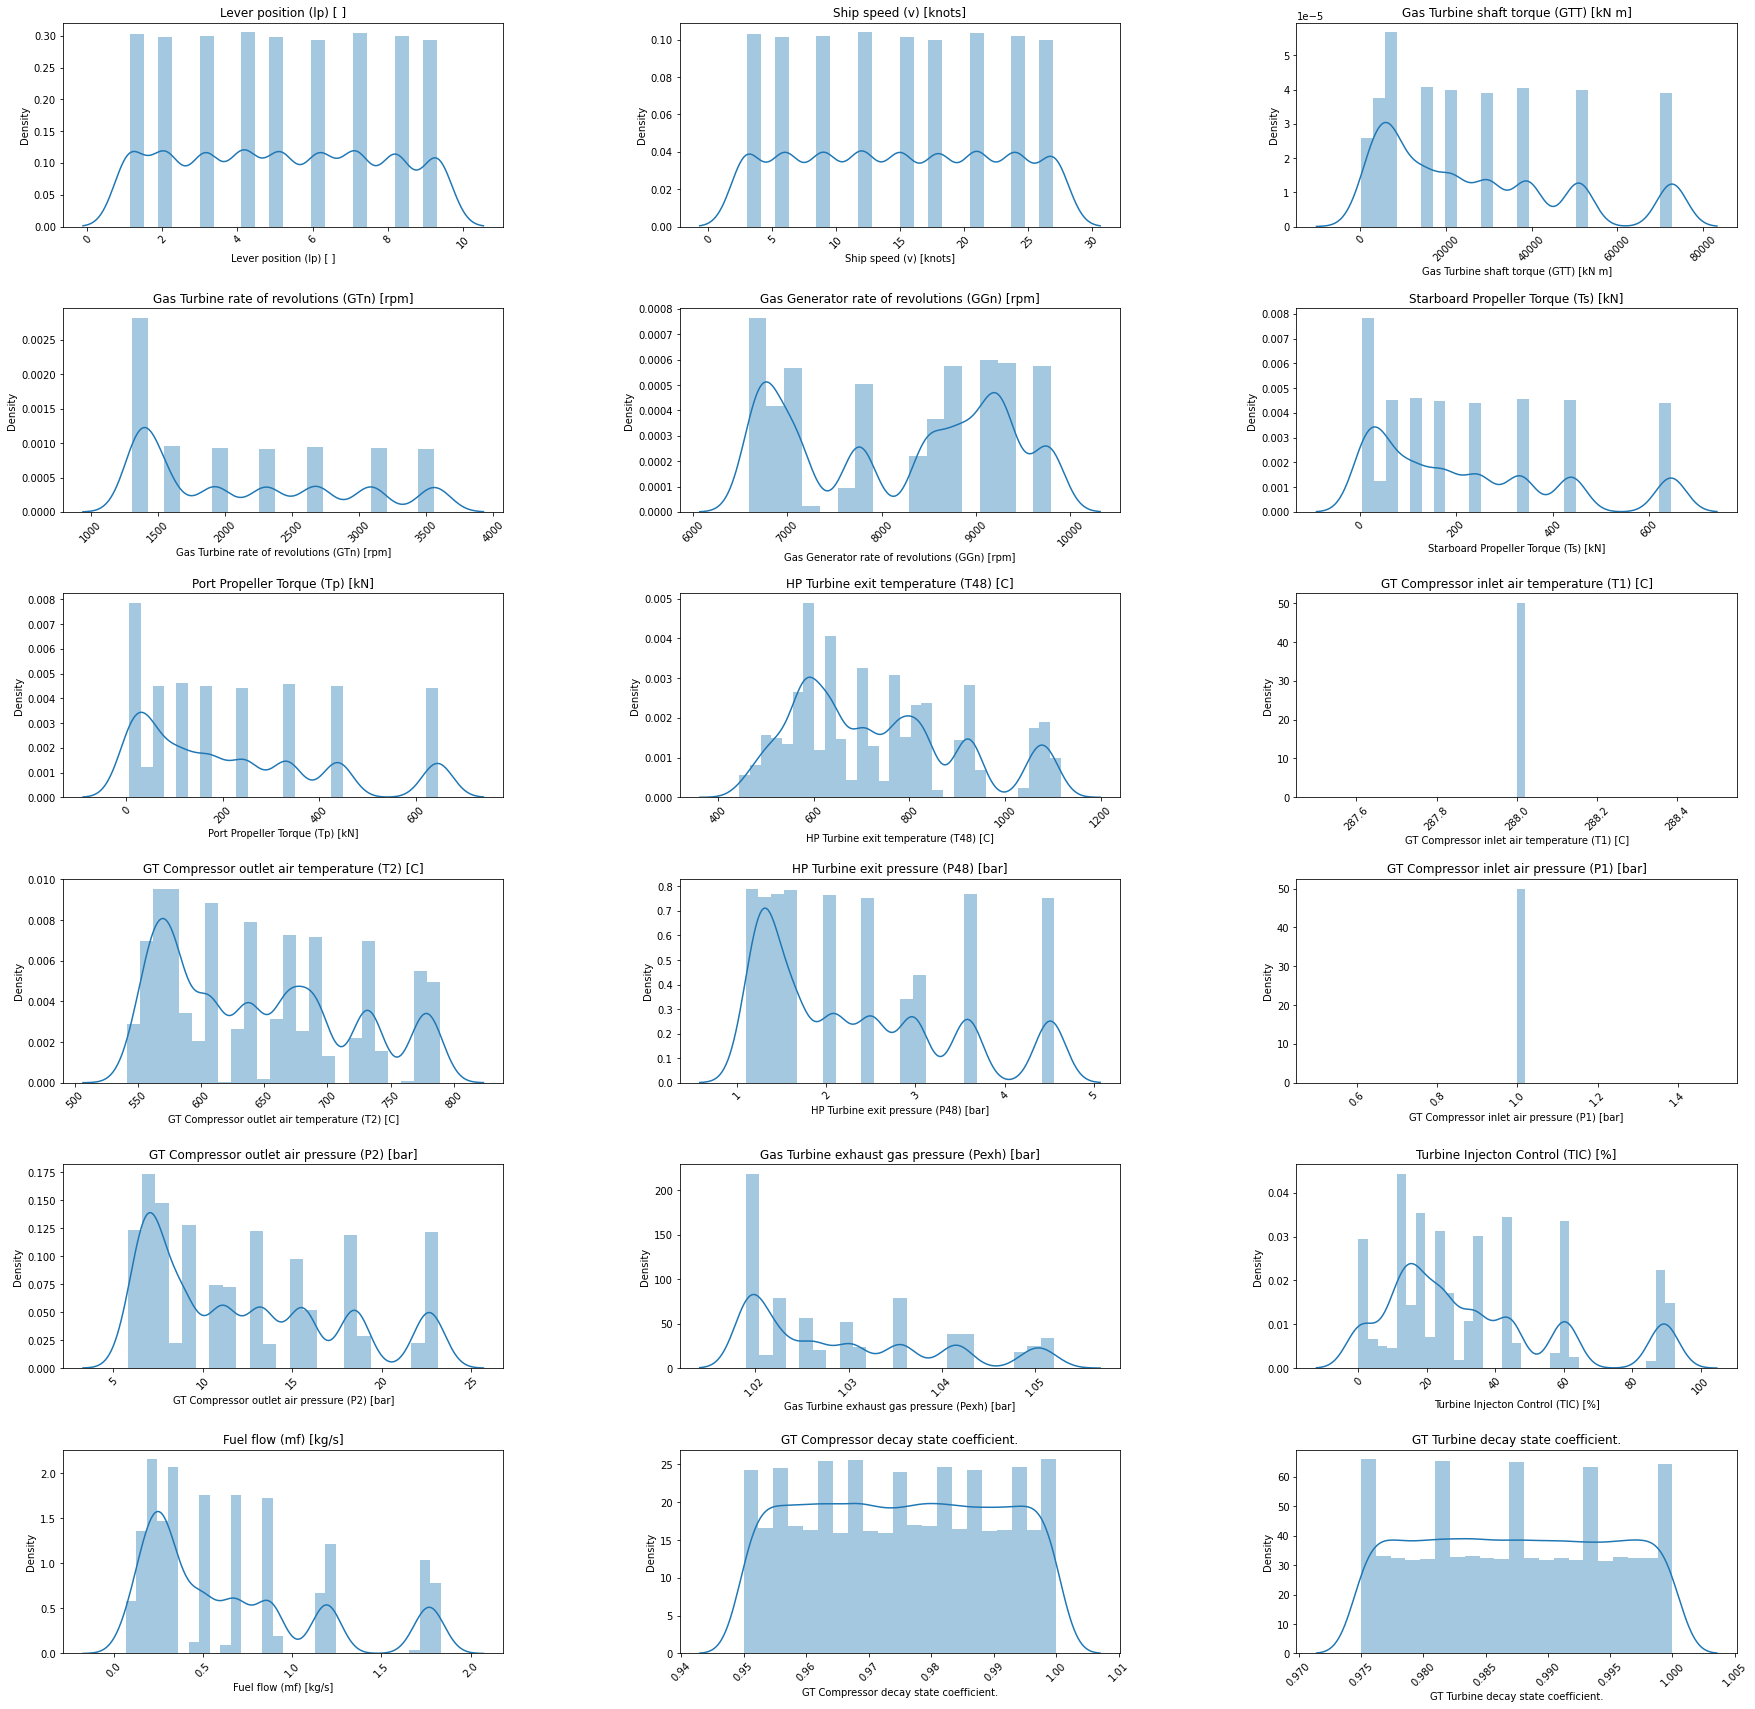

In [ ]:
fig=plt.figure(figsize=(30,30))
cols=3
plt.subplots_adjust(wspace=0.4,hspace=0.4)
rows=int(np.ceil((df.shape[1])/cols))  
for i,column in enumerate(df.columns):
  ax=fig.add_subplot(rows,cols,i+1)
  ax.set_title(column)
  if df[column].dtype==np.object:
    sns.countplot(y=column,data=df)
    plt.xticks(rotation=45)
  else:
    sns.distplot(df[column])
    plt.xticks(rotation=45)
plt.savefig('curves.png')